In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math
import scipy.sparse as sp
import src.abm2d as abm2d


In [3]:
alpha = 0.01
N = 1100
L = 1000
args = {'N':N,
            'α':alpha,
            'L':L,
            'path': "../data",
        'title': f"abm2d_base_params"
       }
abm2d.abm2d(**args)

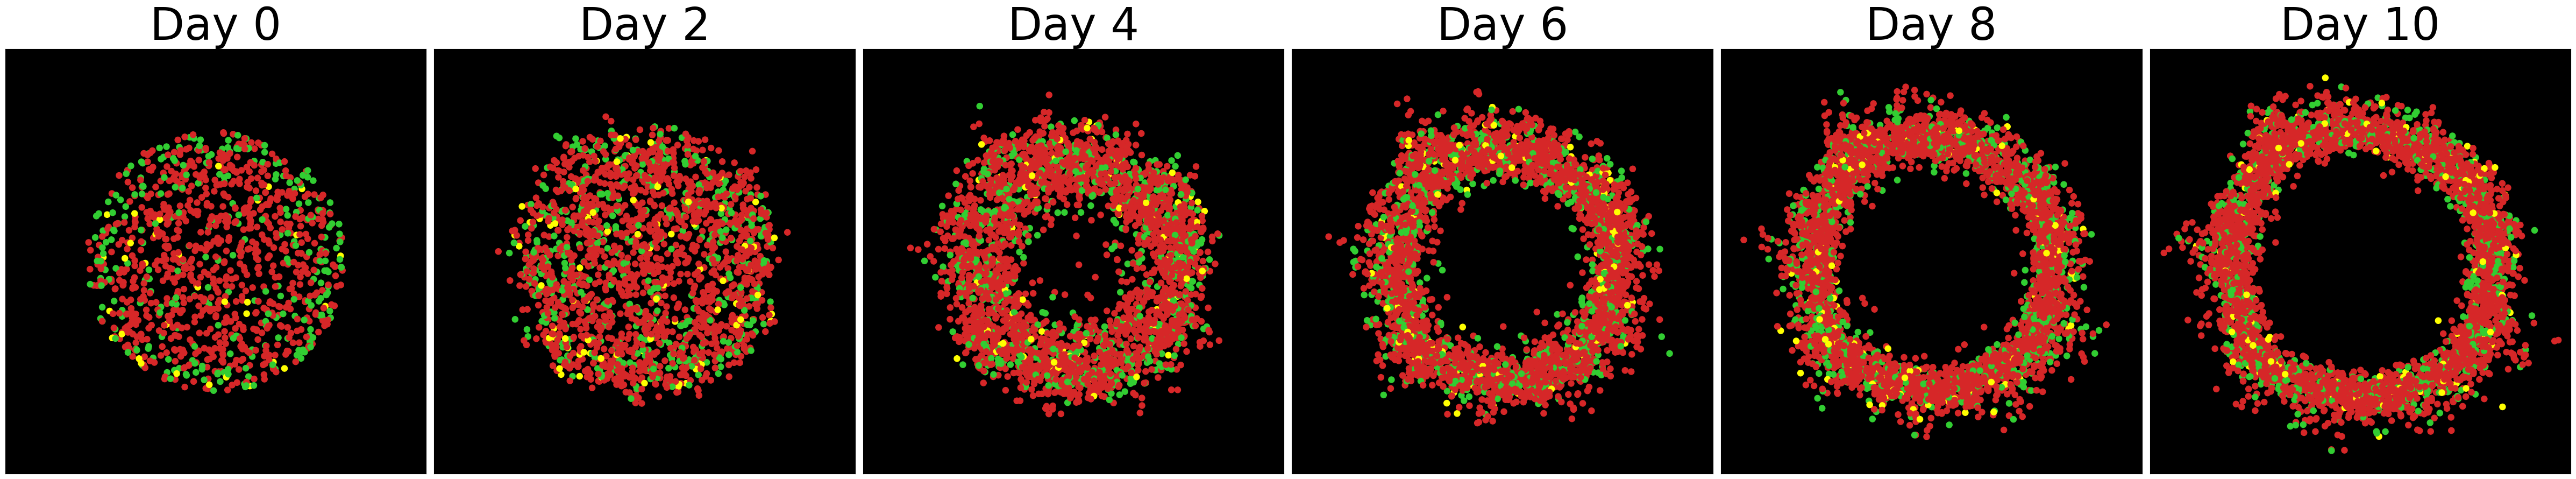

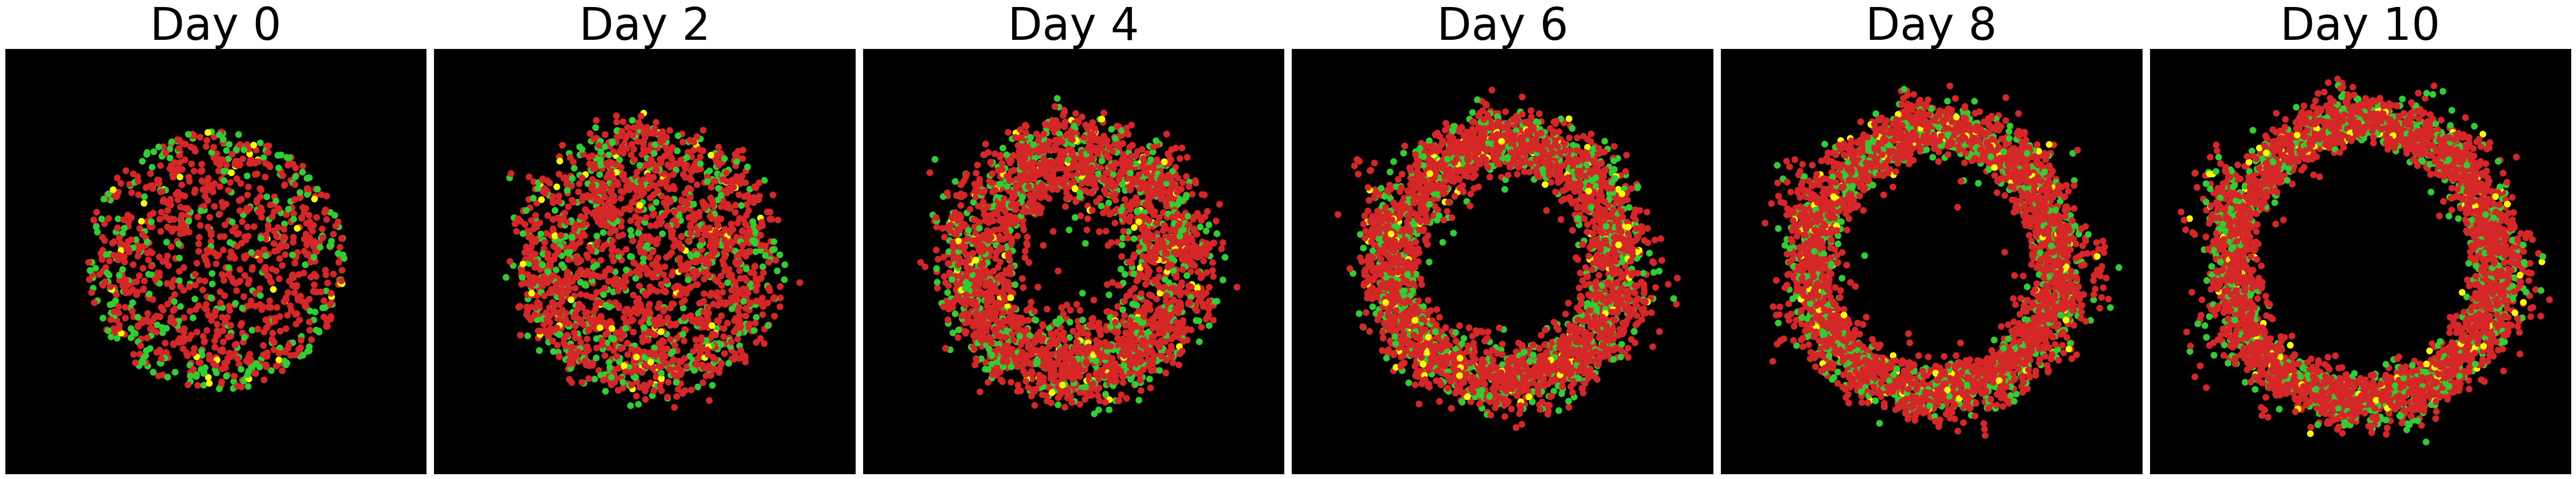

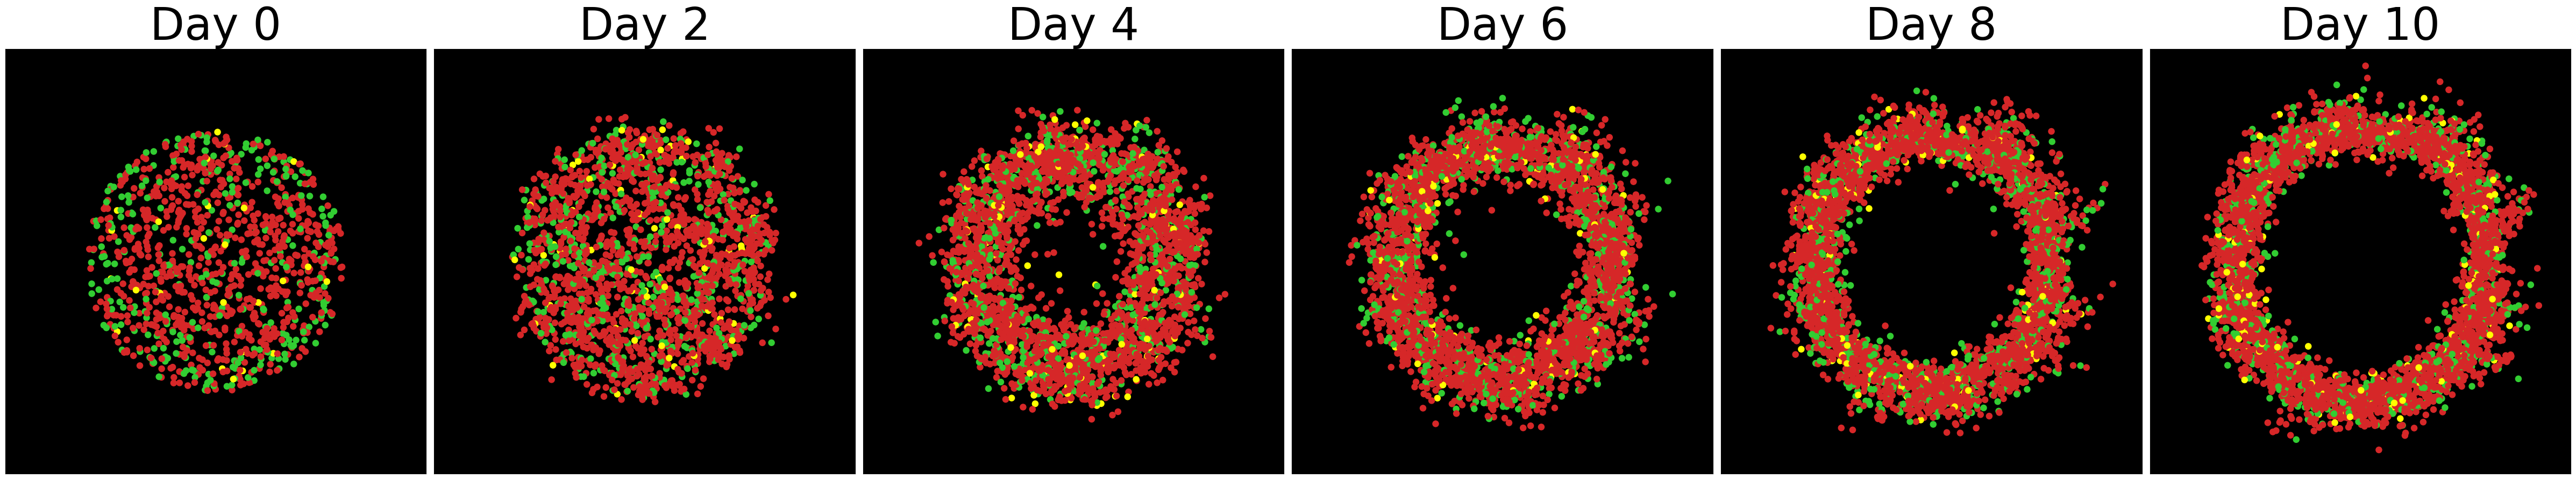

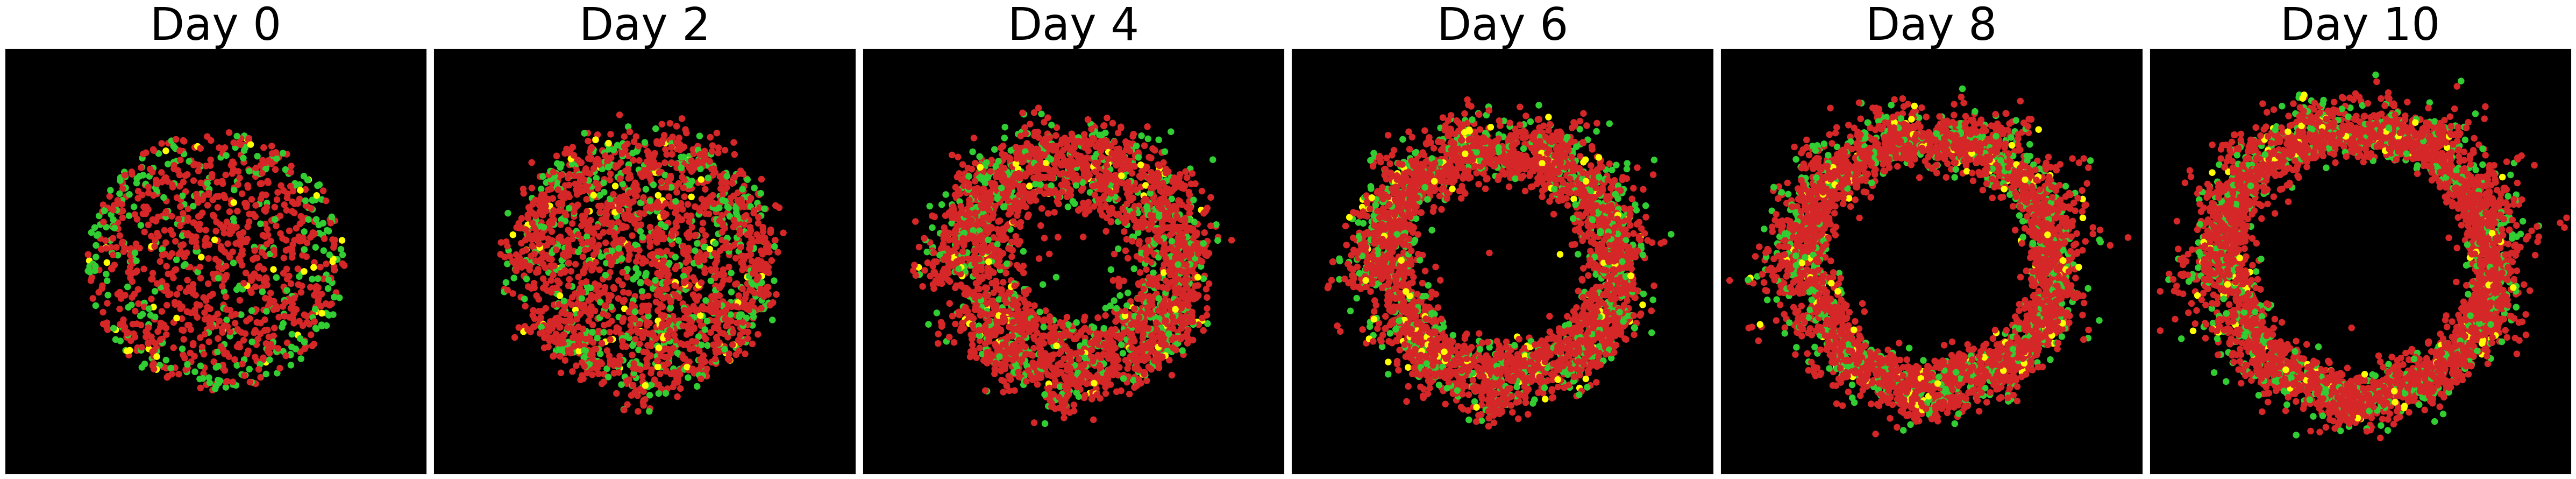

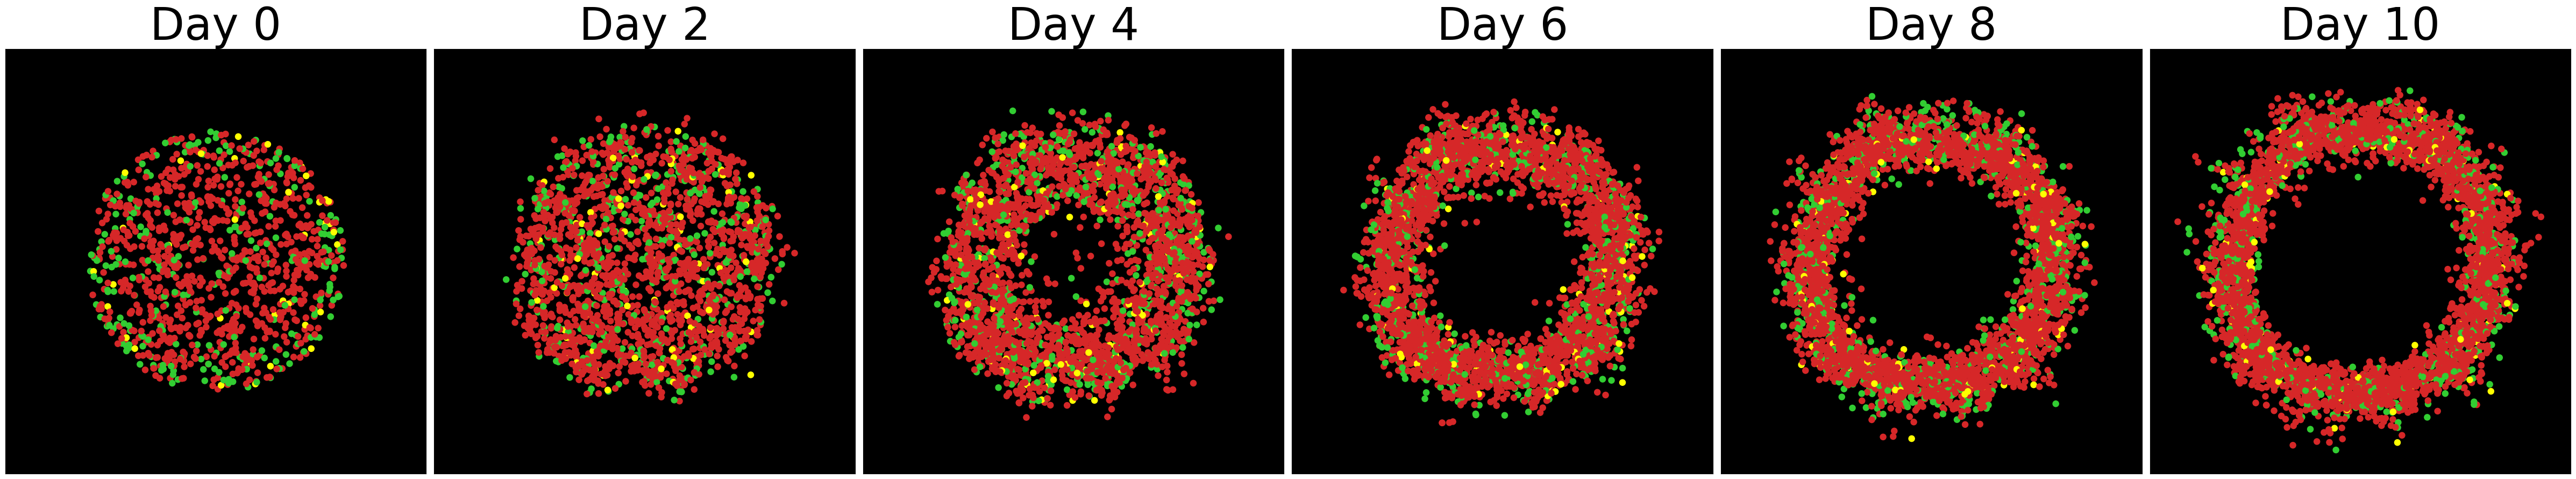

In [2]:
eta1_base = 0.4
for eta1 in np.logspace(np.log10(eta1_base / 2), np.log10(2 * eta1_base), 5):
    alpha = 0.01
    N = 1100
    L = 1000
    args = {'N':N,
            'α':alpha,
            'L':L,
            'eta1':eta1,
        'path': "../data",
        'title': f"abm2d"
       }
    abm2d.abm2d(**args)
    out = np.load(f"{args['path']}/{args['title']}.npz", allow_pickle=True)
    fig, ax  = plt.subplots(1,6, figsize=(48,9))
    fontsize = 20
    L = out['L']
    Xs = out['X'] - L/2
    Ys = out['Y'] - L/2
    states = out['state'].astype(int)
    for i, day in enumerate(np.arange(0,11,2)):
        living = np.where(states[day] > 0)
        X = Xs[day][living]
        Y = Ys[day][living]
        state = states[day][living]
        title = f"Day {day}"
    
        colormap = np.array(["lightseagreen", "tab:red", "yellow", "limegreen"])
        ax[i].scatter(X,Y,c=colormap[state], s = 64)
        # ax[i].set_xlabel("$x$",fontsize=fontsize)
        # ax[i].set_ylabel("$y$",fontsize=fontsize)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title(title,fontsize=3*fontsize)
        ax[i].set_xlim(-400,400)
        ax[i].set_ylim(-400,400)
        ax[i].set_facecolor('black')
    fig.tight_layout()
    # fig.savefig(f'../figures/snapshots_c_a={c_a}.png')

In [3]:
# for N in np.arange(700,900,50):
#     hrs = np.array(np.arange(0,11,2),dtype = int)*24
#     L = out['L']
#     Xs = out['X'][hrs] - L/2
#     Ys = out['Y'][hrs] - L/2
#     states = out['state'][hrs].astype(int)
#     for i, day in enumerate(np.arange(0,11,2)):
#         living = np.where(states[i] > 0)
#         tumor = {'X':Xs[i][living],
#                  'Y':Ys[i][living],
#                  'state': states[i][living],
#                  'title': f"Day {day}"}
#         visualize_cell(**tumor)
    